# **[AIO 2022] Multilayer Perceptron - Exercise**

**Họ và tên: Võ Phan Anh Quân**

# **Phần 1: Mô tả lý thuyết**

Bài tập tuần này sẽ xoay quanh việc sử dụng Multi-layer Perceptron (MLP) để thực hiện các task như: regression, classification với non-linear data, và classification với image và so sánh với các model đã được học như linear regression model và softmax regression model.

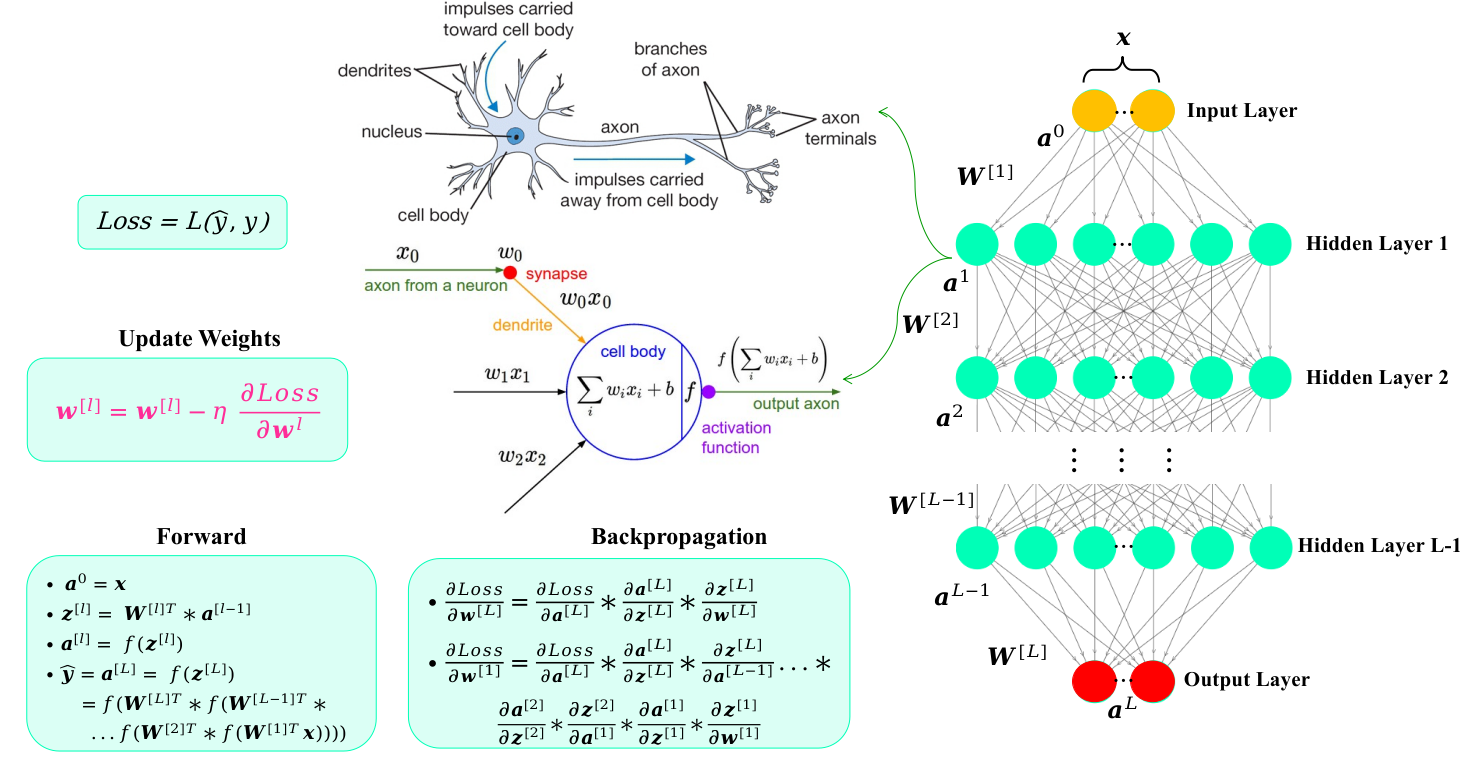

## **1. Linear Regression, Softmax Regression và MLP Model**

### **(a) Một số ký hiệu**

* **x**: Input vector (features)
* **y**: label, kết quả thực
* **$\hat{y}$**: kết quả dự đoán
* **W**: weights của model (nhiệm vụ của huấn luyện là tìm bộ **W** để $y \approx \hat{y}$
* **Loss**: loss function, mục tiêu huấn luyện là tìm loss nhỏ nhất
* **n**: Số lượng feature của một sample
* **$f(\cdot)$**: Activation function
* **m**: số lượng sample trong một batch
* **C**: số lượng class cần phân loại

### **(b) Linear Regression**

Sử dụng cho regression task (ví dụ dự đoán giá nhà).
$$\hat{y} = W^Tx = w_0 + w_1x_1 + \dots + w_nx_n$$
Loss thường được dùng là SE: $$Loss = L(y, \hat{y}) = \frac{1}{m}\displaystyle\sum_{i = 1}^{m}{(y_i - \hat{y}_i)^2}$$


# **Problem 1: MLP FOR REGRESSION**

## **Problem 1a: Linear Regression Model**

### **Download data**

In [ ]:
!gdown --id 1fB9P1Ha1ofQiYWU9wkLAxDZTbtp3Gfqz

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1fB9P1Ha1ofQiYWU9wkLAxDZTbtp3Gfqz
To: /content/Auto_MPG_data.csv
100% 15.4k/15.4k [00:00<00:00, 24.1MB/s]


In [ ]:
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 6.5 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

In [ ]:
dataset = pd.read_csv('Auto_MPG_data.csv')
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


## **Tiền xử lý dữ liệu dạng table**

### **Lấy label và chia bộ dữ liệu train/val**

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
val_dataset = dataset.drop(train_dataset.index)

In [ ]:
X_train = train_dataset.copy()
X_val = val_dataset.copy()

y_train = X_train.pop('MPG')
y_val = X_val.pop('MPG')

X_train, y_train = X_train.to_numpy().astype(np.float32), y_train.to_numpy().astype(np.float32)
X_val, y_val = X_val.to_numpy().astype(np.float32), y_val.to_numpy().astype(np.float32) 

### **Chuẩn hoá dữ liệu (Data Standardisation)**

In [ ]:
_MEAN = X_train.mean(axis=0)
_STD = X_train.std(axis=0)

X_train = ( X_train-_MEAN)/_STD
X_val = ( X_val-_MEAN)/_STD

In [ ]:
linear_model = tf.keras.Sequential()
linear_model.add(tf.keras.Input(shape= (9,)))
linear_model.add(tf.keras.layers.Dense(1))

linear_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt = tf.optimizers.SGD(learning_rate= 0.1)
linear_model.compile(optimizer= opt, loss= 'mse',
                     metrics= [tfa.metrics.RSquare(), tf.keras.metrics.MeanAbsoluteError()])

linear_history = linear_model.fit(X_train, y_train, validation_data= (X_val, y_val), epochs= 100)

Epoch 1/100
10/10 [==============================] - 3s 27ms/step - loss: 174.8569 - r_square: -1.9367 - mean_absolute_error: 10.6829 - val_loss: 18.3989 - val_r_square: 0.7183 - val_mean_absolute_error: 3.2208
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 14.8316 - r_square: 0.7509 - mean_absolute_error: 2.8350 - val_loss: 11.6993 - val_r_square: 0.8209 - val_mean_absolute_error: 2.5177
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 12.5773 - r_square: 0.7888 - mean_absolute_error: 2.6827 - val_loss: 11.3850 - val_r_square: 0.8257 - val_mean_absolute_error: 2.4029
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 12.1985 - r_square: 0.7951 - mean_absolute_error: 2.6657 - val_loss: 11.9029 - val_r_square: 0.8177 - val_mean_absolute_error: 2.4175
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 12.0640 - r_square: 0.7974 - mean_absolute_error: 2.5886 - val_loss: 13.5120 - val_r_square: 0.

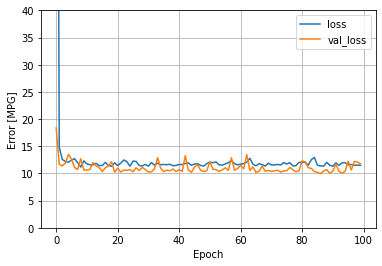

In [ ]:
plt.plot(linear_history.history['loss'], label='loss')
plt.plot(linear_history.history['val_loss'], label='val_loss')
plt.ylim([0, 40])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

In [ ]:
hist = pd.DataFrame(linear_history.history)
hist['epoch'] = linear_history.epoch
hist.tail()

,loss,r_square,mean_absolute_error,val_loss,val_r_square,val_mean_absolute_error,epoch
95,11.576705,0.805570,2.605774,12.239604,0.812583,2.566532,95
96,11.642558,0.804464,2.583094,10.632712,0.837188,2.414308,96
97,11.495399,0.806936,2.581085,12.203035,0.813143,2.850347,97
98,11.531168,0.806335,2.592510,12.094419,0.814806,2.573145,98
99,11.494966,0.806943,2.591494,11.751684,0.820054,2.797981,99


In [ ]:
print("Min train loss: ", min(hist['loss']))
print("Min val loss: ", min(hist['val_loss']))
print("Min MAE: ", min(hist['mean_absolute_error']))
print("Min val MAE: ", min(hist['val_mean_absolute_error']))
print("Max r-squared loss: ", max(hist['r_square']))
print("Max val r-squared loss: ", max(hist['val_r_square']))

Min train loss:  11.181694030761719
Min val loss:  9.966848373413086
Min MAE:  2.54076886177063
Min val MAE:  2.352797746658325
Max r-squared loss:  0.8122045993804932
Max val r-squared loss:  0.8473840951919556


## **Problem 1b: MLP Regression Model**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

In [ ]:
dataset = pd.read_csv("/content/Auto_MPG_data.csv")
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


## **Tiền xử lý dữ liệu dạng table**

### **Lấy label và chia bộ dữ liệu train/val**

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
val_dataset = dataset.drop(train_dataset.index)

In [ ]:
X_train = train_dataset.copy()
X_val = val_dataset.copy()

y_train = X_train.pop('MPG')
y_val = X_val.pop('MPG')

X_train, y_train = X_train.to_numpy().astype(np.float32), y_train.to_numpy().astype(np.float32)
X_val, y_val = X_val.to_numpy().astype(np.float32), y_val.to_numpy().astype(np.float32) 

### **Chuẩn hoá dữ liệu (Data Standardisation)**

In [ ]:
_MEAN = X_train.mean(axis=0)
_STD = X_train.std(axis=0)

X_train = ( X_train-_MEAN)/_STD
X_val = ( X_val-_MEAN)/_STD

In [ ]:
MLP_regression_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 64, input_shape = [9], activation = 'relu'),
    tf.keras.layers.Dense(units = 64, activation = 'relu'),
    tf.keras.layers.Dense(units = 1)
])

MLP_regression_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                640       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate = 0.003)
MLP_regression_model.compile(optimizer = opt, loss = 'mse',
                             metrics = [tfa.metrics.RSquare(), tf.keras.metrics.MeanAbsoluteError()])

MLP_regression_history = MLP_regression_model.fit( X_train, y_train, validation_data=(X_val, y_val), batch_size = 32 ,epochs = 100)

Epoch 1/100
10/10 [==============================] - 1s 25ms/step - loss: 296.0734 - r_square: -3.9725 - mean_absolute_error: 14.5132 - val_loss: 26.3167 - val_r_square: 0.5970 - val_mean_absolute_error: 4.2432
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 19.5951 - r_square: 0.6709 - mean_absolute_error: 3.3382 - val_loss: 11.0159 - val_r_square: 0.8313 - val_mean_absolute_error: 2.6030
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 11.7289 - r_square: 0.8030 - mean_absolute_error: 2.6248 - val_loss: 8.9781 - val_r_square: 0.8625 - val_mean_absolute_error: 2.3198
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 9.7467 - r_square: 0.8363 - mean_absolute_error: 2.3390 - val_loss: 8.7019 - val_r_square: 0.8668 - val_mean_absolute_error: 2.0379
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 9.5639 - r_square: 0.8394 - mean_absolute_error: 2.2224 - val_loss: 10.9111 - val_r_square: 0.8329

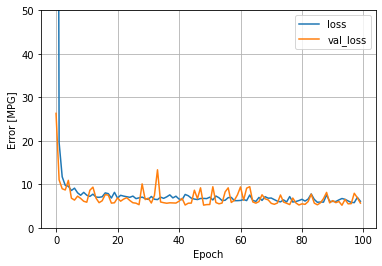

In [ ]:
plt.plot(MLP_regression_history.history['loss'], label='loss')
plt.plot(MLP_regression_history.history['val_loss'], label='val_loss')
plt.ylim([0, 50])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

In [ ]:
hist = pd.DataFrame(MLP_regression_history.history)
hist['epoch'] = MLP_regression_history.epoch
hist.tail()

,loss,r_square,mean_absolute_error,val_loss,val_r_square,val_mean_absolute_error,epoch
95,6.181332,0.896185,1.734503,5.515628,0.915543,1.837961,95
96,5.842118,0.901882,1.752027,5.551438,0.914994,1.806554,96
97,5.789838,0.902760,1.659464,7.940225,0.878416,2.216022,97
98,6.998153,0.882467,1.865729,6.912735,0.894150,1.924827,98
99,6.092406,0.897679,1.712639,5.677711,0.913061,1.877760,99


In [ ]:
print("Min train loss: ", min(hist['loss']))
print("Min val loss: ", min(hist['val_loss']))
print("Min MAE: ", min(hist['mean_absolute_error']))
print("Min val MAE: ", min(hist['val_mean_absolute_error']))
print("Max r-squared loss: ", max(hist['r_square']))
print("Max val r-squared loss: ", max(hist['val_r_square']))

Min train loss:  5.789837837219238
Min val loss:  5.185681343078613
Min MAE:  1.6594642400741577
Min val MAE:  1.7192461490631104
Max r-squared loss:  0.9027602672576904
Max val r-squared loss:  0.9205949902534485


# **Problem 2: MLP for Classification**

In [ ]:
!gdown --id 1bUBWn2Osoc6Y1XskxF_o0JgWVFw0iV_6

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1bUBWn2Osoc6Y1XskxF_o0JgWVFw0iV_6
To: /content/NonLinear_data.npy
100% 5.57k/5.57k [00:00<00:00, 9.36MB/s]


In [ ]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

## **Problem 2a: Softmax Regression model for Classification (Nonlinear data)**

### **Load Data**

In [ ]:
data_path = "/content/NonLinear_data.npy"
data = np.load(data_path, allow_pickle=True).item()
X, labels = data["X"], data["labels"]
X, labels = X.astype(np.float32), labels.astype(np.float32)

### **Train model**

In [ ]:
num_class = 3
SR_model = tf.keras.Sequential([
    # Dense layer: 3 nodes (num_class), input shape = 2, activation = softmax 
    tf.keras.layers.Dense(units = 3, input_shape = [2], activation = 'softmax')
])

SR_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy()
opt = tf.keras.optimizers.SGD(learning_rate = 2)
SR_model.compile(optimizer = opt, loss = loss, metrics= ['accuracy'])

SR_history = SR_model.fit(X, labels, batch_size = X.shape[0], epochs = 500)

Epoch 1/500
1/1 [==============================] - 1s 520ms/step - loss: 1.1927 - accuracy: 0.1233
Epoch 2/500
1/1 [==============================] - 0s 8ms/step - loss: 1.1158 - accuracy: 0.1967
Epoch 3/500
1/1 [==============================] - 0s 9ms/step - loss: 1.0552 - accuracy: 0.2967
Epoch 4/500
1/1 [==============================] - 0s 10ms/step - loss: 1.0068 - accuracy: 0.3633
Epoch 5/500
1/1 [==============================] - 0s 10ms/step - loss: 0.9678 - accuracy: 0.4133
Epoch 6/500
1/1 [==============================] - 0s 10ms/step - loss: 0.9361 - accuracy: 0.4433
Epoch 7/500
1/1 [==============================] - 0s 22ms/step - loss: 0.9102 - accuracy: 0.4700
Epoch 8/500
1/1 [==============================] - 0s 8ms/step - loss: 0.8887 - accuracy: 0.4767
Epoch 9/500
1/1 [==============================] - 0s 10ms/step - loss: 0.8708 - accuracy: 0.4933
Epoch 10/500
1/1 [==============================] - 0s 8ms/step - loss: 0.8558 - accuracy: 0.5000
Epoch 11/500
1/1 [====

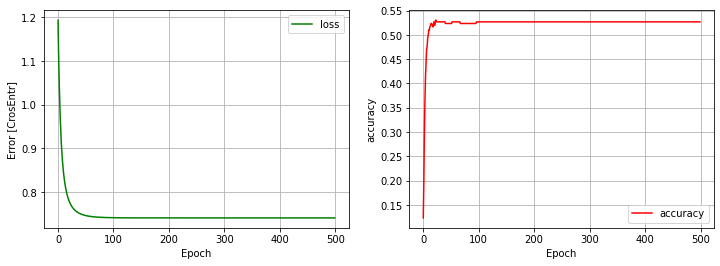

In [ ]:
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(SR_history.history['loss'], label='loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(SR_history.history['accuracy'], label='accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)

In [ ]:
hist = pd.DataFrame(SR_history.history)
hist['epoch'] = SR_history.epoch
hist.tail()

,loss,accuracy,epoch
495,0.74124,0.526667,495
496,0.74124,0.526667,496
497,0.74124,0.526667,497
498,0.74124,0.526667,498
499,0.74124,0.526667,499


In [ ]:
print("Max train acc: ", max(hist['accuracy']))
print("Min train loss: ", min(hist['loss']))

Max train acc:  0.5299999713897705
Min train loss:  0.741239607334137


## **Problem 2b: MLP model for Classification (nonlinear data)**

In [ ]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

### **Load Data**

In [ ]:
data_path = "/content/NonLinear_data.npy"
data = np.load(data_path, allow_pickle=True).item()
X, labels = data["X"], data["labels"]
X, labels = X.astype(np.float32), labels.astype(np.float32)

### **Train model**

In [ ]:
num_class = 3
MLP_N_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 128, input_shape = [2], activation = 'relu'),
    tf.keras.layers.Dense(units = num_class)
])

MLP_N_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               384       
                                                                 
 dense_6 (Dense)             (None, 3)                 387       
                                                                 
Total params: 771
Trainable params: 771
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
opt = tf.keras.optimizers.SGD(learning_rate = 2)
MLP_N_model.compile(optimizer = opt, loss = loss, metrics = ['accuracy'])

MLP_N_history = MLP_N_model.fit(X, labels, batch_size = X.shape[0], epochs = 500)

Epoch 1/500
1/1 [==============================] - 1s 985ms/step - loss: 1.0913 - accuracy: 0.3833
Epoch 2/500
1/1 [==============================] - 0s 13ms/step - loss: 0.9954 - accuracy: 0.6000
Epoch 3/500
1/1 [==============================] - 0s 23ms/step - loss: 0.9280 - accuracy: 0.5533
Epoch 4/500
1/1 [==============================] - 0s 10ms/step - loss: 0.8743 - accuracy: 0.5467
Epoch 5/500
1/1 [==============================] - 0s 16ms/step - loss: 0.8292 - accuracy: 0.5533
Epoch 6/500
1/1 [==============================] - 0s 12ms/step - loss: 0.7940 - accuracy: 0.5500
Epoch 7/500
1/1 [==============================] - 0s 13ms/step - loss: 0.7676 - accuracy: 0.5533
Epoch 8/500
1/1 [==============================] - 0s 19ms/step - loss: 0.7485 - accuracy: 0.5633
Epoch 9/500
1/1 [==============================] - 0s 20ms/step - loss: 0.7364 - accuracy: 0.5533
Epoch 10/500
1/1 [==============================] - 0s 12ms/step - loss: 0.7365 - accuracy: 0.6500
Epoch 11/500
1/1 [

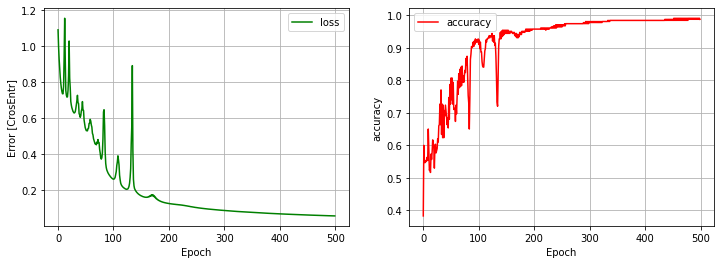

In [ ]:
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(MLP_N_history.history['loss'], label='loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(MLP_N_history.history['accuracy'], label='accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)

In [ ]:
hist = pd.DataFrame(MLP_N_history.history)
hist['epoch'] = MLP_N_history.epoch
hist.tail()

,loss,accuracy,epoch
495,0.059099,0.986667,495
496,0.058988,0.990000,496
497,0.058895,0.986667,497
498,0.058843,0.990000,498
499,0.058733,0.986667,499


In [ ]:
print("Max train acc: ", max(hist['accuracy']))
print("Min train loss: ", min(hist['loss']))

Max train acc:  0.9900000095367432
Min train loss:  0.058732833713293076


# **Problem 3: MLP FOR CLASSIFICATION (image data)**
Cho 1 tập data **FER-2013.zip** gồm các ảnh thể hiện 7 cảm xúc khác nhau trên khuôn mặt con người. Các bạn hãy xử lý data và xây dựng model sau để dự phân loại được cảm xúc gương mặt được thể hiện trong ảnh input:

## **Preprocessing data**

### **Download data**

In [ ]:
!gdown --id 1bFx6uiQV-GUGwL3PwYRIYdmRCF9hS2bP

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1bFx6uiQV-GUGwL3PwYRIYdmRCF9hS2bP
To: /content/FER-2013.zip
100% 63.3M/63.3M [00:00<00:00, 215MB/s]


### **Giải nén data**

In [ ]:
!unzip -q "/content/FER-2013.zip"

### **Load và xử lý data dạng ảnh**
**Cách xử lý data dùng image_dataset_from_directory**

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

In [ ]:
batch_size = 256
img_height = 48
img_width = 48
train_dir = "/content/train" 
test_dir = "/content/test"   

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  color_mode="grayscale")

Found 28709 files belonging to 7 classes.
Using 22968 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  color_mode="grayscale")

Found 28709 files belonging to 7 classes.
Using 5741 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


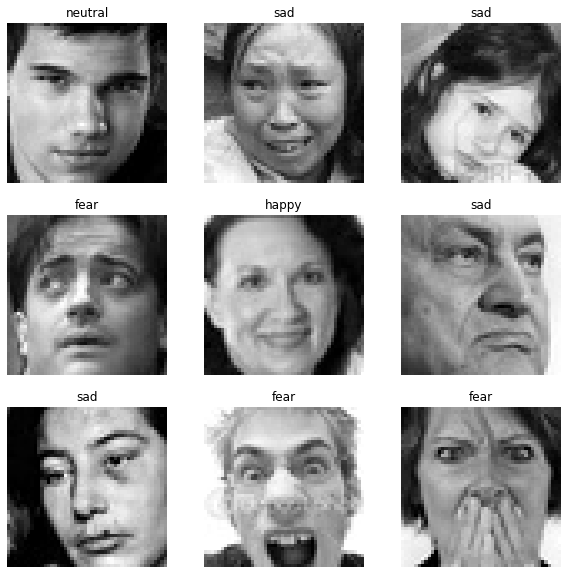

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(np.squeeze(images[i].numpy()).astype("uint8"), cmap="gray")
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
normalized_train_ds = train_ds.map(lambda x, y: (tf.subtract(tf.divide(x, 127.5),1), y))
normalized_val_ds = val_ds.map(lambda x, y: (tf.subtract(tf.divide(x, 127.5),1), y))

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(buffer_size=512).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalized_train_ds = normalized_train_ds.cache().shuffle(buffer_size=512).prefetch(buffer_size=AUTOTUNE)
normalized_val_ds = normalized_val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## **Problem 3a. Train model (Softmax Regression)**

**3a. (Không Normalize ảnh).**
Xây dựng sofmax regression model:
* **Loss:** Cross Entropy (SparseCategoricalCrossentropy)
* **Metric:** Accuracy
* **Epochs:** 100
* **Learning rate:** 0.006
* **Batch size:** 256
* **Optimizer:** SGD

In [ ]:
num_class = 7

FER_SR_model = tf.keras.Sequential()
FER_SR_model.add(tf.keras.layers.Flatten(input_shape= (48, 48, 1)))
FER_SR_model.add(tf.keras.layers.Dense(7, activation= 'softmax'))

FER_SR_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense_7 (Dense)             (None, 7)                 16135     
                                                                 
Total params: 16,135
Trainable params: 16,135
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate = 0.006)
loss = tf.keras.losses.SparseCategoricalCrossentropy()

FER_SR_model.compile(optimizer= opt, loss= loss, metrics= ['accuracy'])

FER_SR_history = FER_SR_model.fit(train_ds, validation_data= val_ds, epochs = 100)

Epoch 1/100
90/90 [==============================] - 7s 21ms/step - loss: 88298.1016 - accuracy: 0.1747 - val_loss: 51910.7773 - val_accuracy: 0.1832
Epoch 2/100
90/90 [==============================] - 0s 4ms/step - loss: 74353.0234 - accuracy: 0.1921 - val_loss: 98225.1406 - val_accuracy: 0.1913
Epoch 3/100
90/90 [==============================] - 0s 4ms/step - loss: 70784.8828 - accuracy: 0.2002 - val_loss: 70453.3047 - val_accuracy: 0.2237
Epoch 4/100
90/90 [==============================] - 0s 4ms/step - loss: 69239.7109 - accuracy: 0.2062 - val_loss: 81736.2266 - val_accuracy: 0.2848
Epoch 5/100
90/90 [==============================] - 0s 5ms/step - loss: 65351.7734 - accuracy: 0.2130 - val_loss: 92943.4141 - val_accuracy: 0.1974
Epoch 6/100
90/90 [==============================] - 0s 4ms/step - loss: 63593.3789 - accuracy: 0.2136 - val_loss: 57374.7969 - val_accuracy: 0.1663
Epoch 7/100
90/90 [==============================] - 0s 4ms/step - loss: 61472.6641 - accuracy: 0.2233 - 

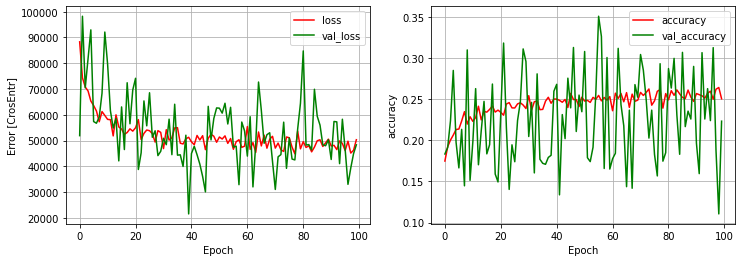

In [ ]:
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(FER_SR_history.history['loss'], label='loss', color='red')
plt.plot(FER_SR_history.history['val_loss'], label='val_loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(FER_SR_history.history['accuracy'], label='accuracy', color='red')
plt.plot(FER_SR_history.history['val_accuracy'], label='val_accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)


## **Problem 3b. Train model (Softmax Regression - Normalization)**

**3b. (Normalize ảnh).**
Xây dựng sofmax regression model:
* **Loss:** Cross Entropy (SparseCategoricalCrossentropy)
* **Metric:** Accuracy
* **Epochs:** 100
* **Learning rate:** 0.006
* **Batch size:** 256
* **Optimizer:** SGD \\
Ảnh được Normalize theo công thức:
$$x = \frac{x}{127.5} - 1$$


In [ ]:
num_class = 7

# FER_SRN_model = tf.keras.Sequential()
# FER_SRN_model.add(tf.keras.layers.Flatten(input_shape= (48, 48, 1)))
# FER_SRN_model.add(tf.keras.layers.Dense(units = 7, activation= 'softmax'))

FER_SRN_model = tf.keras.Sequential([
    tf.keras.Input(shape=(48, 48)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units= num_class)

])

FER_SRN_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_8 (Dense)             (None, 7)                 16135     
                                                                 
Total params: 16,135
Trainable params: 16,135
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
opt = tf.keras.optimizers.SGD(learning_rate=0.006)
FER_SRN_model.compile(optimizer=opt,loss=loss, metrics=['accuracy'])

FER_SRN_history = FER_SRN_model.fit(normalized_train_ds, validation_data=normalized_val_ds, epochs=100)

Epoch 1/100
90/90 [==============================] - 6s 19ms/step - loss: 1.9033 - accuracy: 0.2264 - val_loss: 1.8417 - val_accuracy: 0.2519
Epoch 2/100
90/90 [==============================] - 0s 4ms/step - loss: 1.8043 - accuracy: 0.2773 - val_loss: 1.7917 - val_accuracy: 0.2865
Epoch 3/100
90/90 [==============================] - 0s 4ms/step - loss: 1.7640 - accuracy: 0.3021 - val_loss: 1.7656 - val_accuracy: 0.3019
Epoch 4/100
90/90 [==============================] - 1s 6ms/step - loss: 1.7381 - accuracy: 0.3182 - val_loss: 1.7477 - val_accuracy: 0.3139
Epoch 5/100
90/90 [==============================] - 1s 6ms/step - loss: 1.7208 - accuracy: 0.3305 - val_loss: 1.7356 - val_accuracy: 0.3217
Epoch 6/100
90/90 [==============================] - 1s 6ms/step - loss: 1.7077 - accuracy: 0.3362 - val_loss: 1.7265 - val_accuracy: 0.3285
Epoch 7/100
90/90 [==============================] - 1s 6ms/step - loss: 1.6974 - accuracy: 0.3427 - val_loss: 1.7191 - val_accuracy: 0.3334
Epoch 8/100


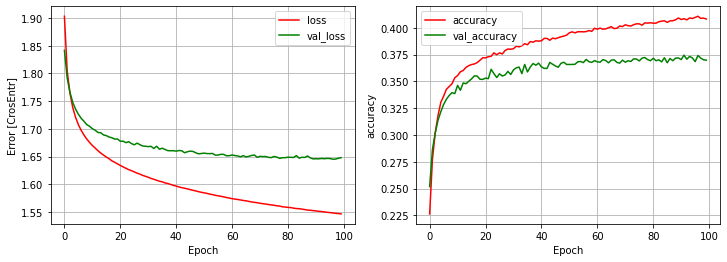

In [ ]:
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(FER_SRN_history.history['loss'], label='loss', color='red')
plt.plot(FER_SRN_history.history['val_loss'], label='val_loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(FER_SRN_history.history['accuracy'], label='accuracy', color='red')
plt.plot(FER_SRN_history.history['val_accuracy'], label='val_accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)


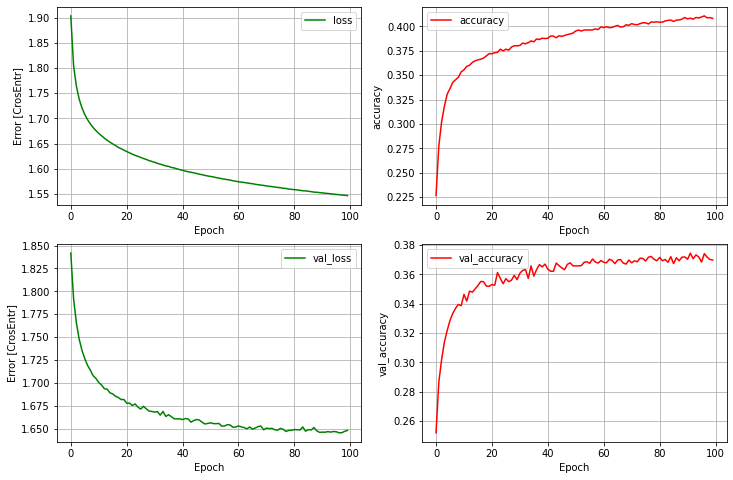

In [ ]:
fig = plt.figure(figsize=(12,8))
plt.subplot(2, 2, 1)
plt.plot(FER_SRN_history.history['loss'], label='loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(FER_SRN_history.history['accuracy'], label='accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(FER_SRN_history.history['val_loss'], label='val_loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(FER_SRN_history.history['val_accuracy'], label='val_accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('val_accuracy')
plt.legend()
plt.grid(True)


In [ ]:
hist = pd.DataFrame(FER_SRN_history.history)
hist['epoch'] = FER_SRN_history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
95,1.548996,0.409657,1.646556,0.368403,95
96,1.548406,0.410745,1.645396,0.374151,96
97,1.547715,0.408786,1.645513,0.371712,97
98,1.547278,0.409004,1.647018,0.370145,98
99,1.546625,0.408177,1.648090,0.369796,99


In [ ]:
print("Max train acc: ", max(hist['accuracy']))
print("Max val acc: ", max(hist['val_accuracy']))

print("Min train loss: ", min(hist['loss']))
print("Min val loss: ", min(hist['val_loss']))

Max train acc:  0.41074538230895996
Max val acc:  0.37449920177459717
Min train loss:  1.5466246604919434
Min val loss:  1.64539635181427


## **Problem 3c. Train model (MLP - Tanh)**

Xây dựng MLP classification model:
* **Hidden layers:** 3 $(1024, 512, 256)$
* **Activation: Tanh** 
* **Loss:** Cross Entropy (SparseCategoricalCrossentropy)
* **Metric:** Accuracy
* **Epochs:** 100
* **Learning rate:** 0.006
* **Batch size:** 256
* **Optimizer:** SGD
Ảnh được Normalize theo công thức:
$$x = \frac{x}{127.5} - 1$$

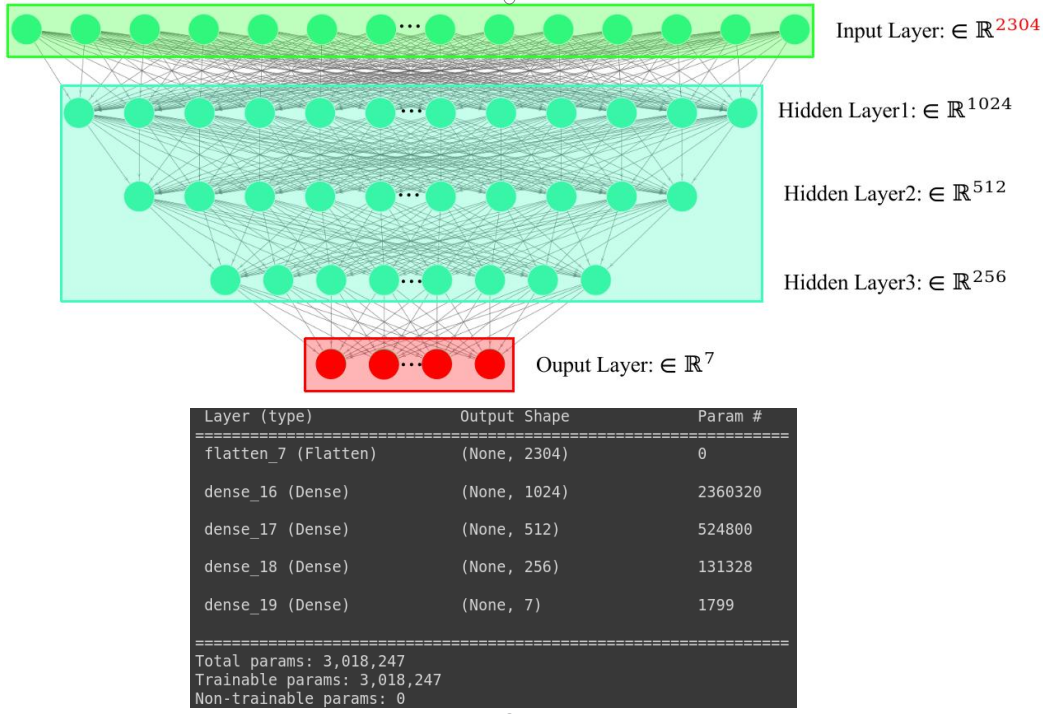

In [ ]:
num_class = 7

MLP_tanh_model = tf.keras.Sequential([
    tf.keras.Input(shape=(48, 48)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units= 1024, activation= 'tanh'),
    tf.keras.layers.Dense(units= 512, activation= 'tanh'),
    tf.keras.layers.Dense(units= 256, activation= 'tanh'),
    tf.keras.layers.Dense(units= num_class)
])

MLP_tanh_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 2304)              0         
                                                                 
 dense_9 (Dense)             (None, 1024)              2360320   
                                                                 
 dense_10 (Dense)            (None, 512)               524800    
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dense_12 (Dense)            (None, 7)                 1799      
                                                                 
Total params: 3,018,247
Trainable params: 3,018,247
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True)
opt = tf.keras.optimizers.SGD(learning_rate = 0.006)
MLP_tanh_model.compile(optimizer = opt, loss= loss, metrics= ['accuracy'])

MLP_tanh_history = MLP_tanh_model.fit(normalized_train_ds, validation_data= normalized_val_ds, epochs= 100)

Epoch 1/100
90/90 [==============================] - 1s 7ms/step - loss: 1.8422 - accuracy: 0.2556 - val_loss: 1.7859 - val_accuracy: 0.2888
Epoch 2/100
90/90 [==============================] - 1s 6ms/step - loss: 1.7352 - accuracy: 0.3157 - val_loss: 1.7348 - val_accuracy: 0.3181
Epoch 3/100
90/90 [==============================] - 0s 5ms/step - loss: 1.6927 - accuracy: 0.3406 - val_loss: 1.7070 - val_accuracy: 0.3348
Epoch 4/100
90/90 [==============================] - 0s 5ms/step - loss: 1.6658 - accuracy: 0.3563 - val_loss: 1.6914 - val_accuracy: 0.3424
Epoch 5/100
90/90 [==============================] - 0s 5ms/step - loss: 1.6473 - accuracy: 0.3626 - val_loss: 1.6774 - val_accuracy: 0.3496
Epoch 6/100
90/90 [==============================] - 0s 5ms/step - loss: 1.6328 - accuracy: 0.3704 - val_loss: 1.6668 - val_accuracy: 0.3567
Epoch 7/100
90/90 [==============================] - 0s 5ms/step - loss: 1.6199 - accuracy: 0.3783 - val_loss: 1.6590 - val_accuracy: 0.3559
Epoch 8/100
9

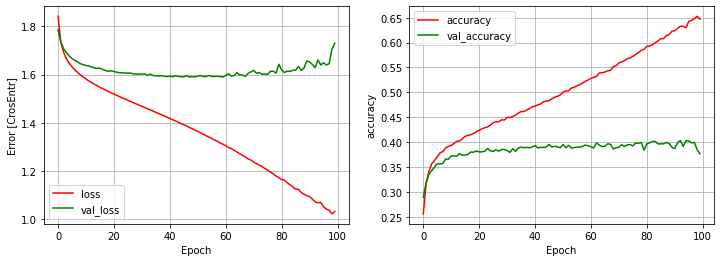

In [ ]:
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(MLP_tanh_history.history['loss'], label='loss', color='red')
plt.plot(MLP_tanh_history.history['val_loss'], label='val_loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(MLP_tanh_history.history['accuracy'], label='accuracy', color='red')
plt.plot(MLP_tanh_history.history['val_accuracy'], label='val_accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)


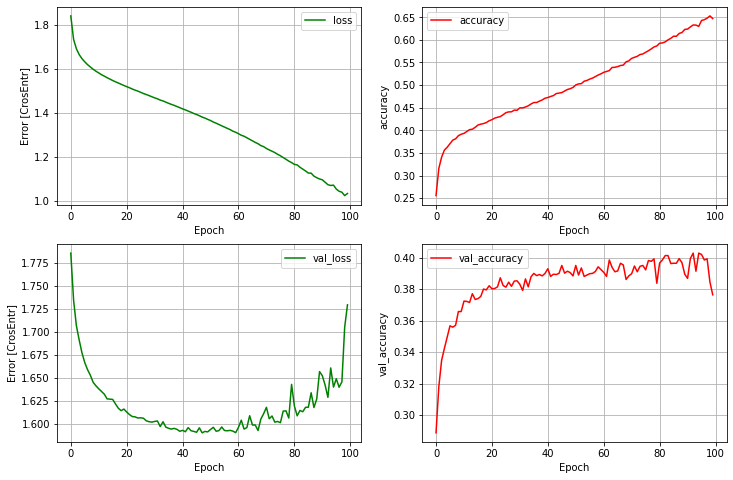

In [ ]:
fig = plt.figure(figsize=(12,8))
plt.subplot(2, 2, 1)
plt.plot(MLP_tanh_history.history['loss'], label='loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(MLP_tanh_history.history['accuracy'], label='accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(MLP_tanh_history.history['val_loss'], label='val_loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(MLP_tanh_history.history['val_accuracy'], label='val_accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('val_accuracy')
plt.legend()
plt.grid(True)


In [ ]:
hist = pd.DataFrame(MLP_tanh_history.history)
hist['epoch'] = MLP_tanh_history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
95,1.052332,0.642764,1.649161,0.402021,95
96,1.042417,0.644505,1.639905,0.398537,96
97,1.037968,0.647945,1.645716,0.399234,97
98,1.022554,0.652908,1.705308,0.384602,98
99,1.032259,0.647031,1.729655,0.376415,99


In [ ]:
print("Max train acc: ", max(hist['accuracy']))
print("Max val acc: ", max(hist['val_accuracy']))

print("Min train loss: ", min(hist['loss']))
print("Min val loss: ", min(hist['val_loss']))

Max train acc:  0.6529083847999573
Max val acc:  0.40289148688316345
Min train loss:  1.0225539207458496
Min val loss:  1.5902936458587646


## **Problem 3d. Train model (MLP - Relu)**

Xây dựng MLP classification model:
* **Hidden layers:** 3 $(1024, 512, 256)$
* **Activation: Relu** 
* **Loss:** Cross Entropy (SparseCategoricalCrossentropy)
* **Metric:** Accuracy
* **Epochs:** 100
* **Learning rate:** 0.006
* **Batch size:** 256
* **Optimizer:** SGD
Ảnh được Normalize theo công thức:
$$x = \frac{x}{127.5} - 1$$

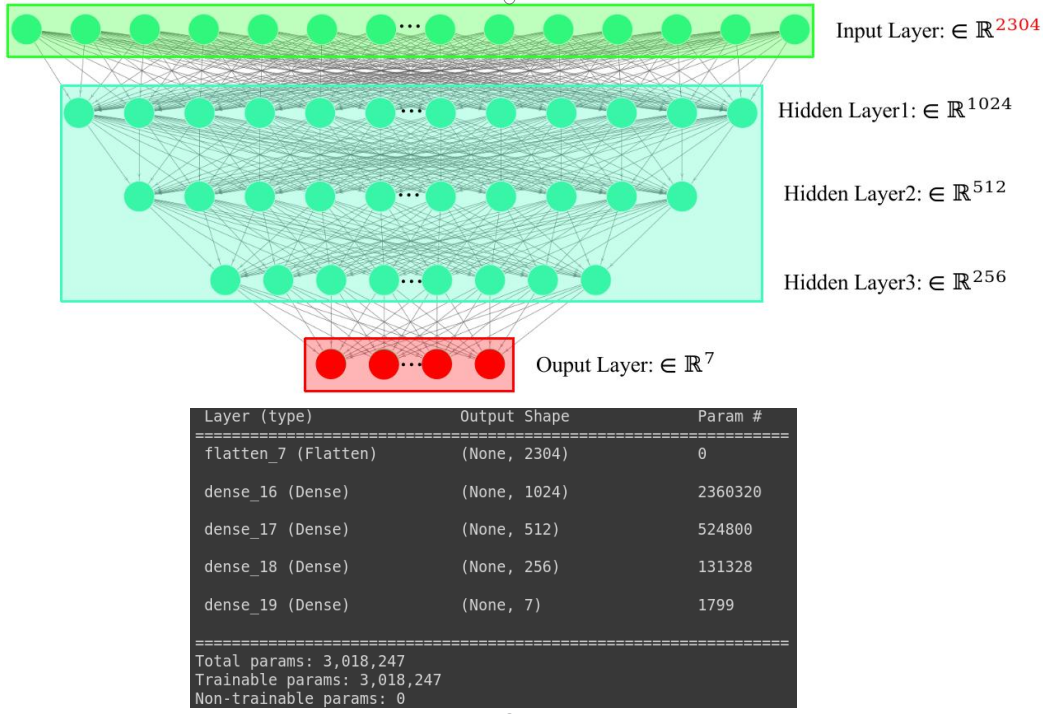

In [ ]:
num_class = 7

MLP_relu_model = tf.keras.Sequential([
    tf.keras.Input(shape=(48, 48)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 1024, activation= 'relu'),
    tf.keras.layers.Dense(units = 512, activation= 'relu'),
    tf.keras.layers.Dense(units = 256, activation= 'relu'),
    tf.keras.layers.Dense(units = num_class),
])

MLP_relu_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 2304)              0         
                                                                 
 dense_13 (Dense)            (None, 1024)              2360320   
                                                                 
 dense_14 (Dense)            (None, 512)               524800    
                                                                 
 dense_15 (Dense)            (None, 256)               131328    
                                                                 
 dense_16 (Dense)            (None, 7)                 1799      
                                                                 
Total params: 3,018,247
Trainable params: 3,018,247
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
opt = tf.keras.optimizers.SGD(learning_rate = 0.006)
MLP_relu_model.compile(optimizer= opt, loss= loss, metrics= ['accuracy'])

MLP_relu_history = MLP_relu_model.fit(normalized_train_ds, validation_data= normalized_val_ds, epochs = 100)

Epoch 1/100
90/90 [==============================] - 2s 11ms/step - loss: 1.8371 - accuracy: 0.2374 - val_loss: 1.7888 - val_accuracy: 0.2623
Epoch 2/100
90/90 [==============================] - 1s 6ms/step - loss: 1.7589 - accuracy: 0.2851 - val_loss: 1.7596 - val_accuracy: 0.2836
Epoch 3/100
90/90 [==============================] - 0s 5ms/step - loss: 1.7272 - accuracy: 0.3115 - val_loss: 1.7358 - val_accuracy: 0.3005
Epoch 4/100
90/90 [==============================] - 0s 5ms/step - loss: 1.7005 - accuracy: 0.3317 - val_loss: 1.7154 - val_accuracy: 0.3168
Epoch 5/100
90/90 [==============================] - 0s 5ms/step - loss: 1.6763 - accuracy: 0.3498 - val_loss: 1.6963 - val_accuracy: 0.3247
Epoch 6/100
90/90 [==============================] - 0s 5ms/step - loss: 1.6537 - accuracy: 0.3652 - val_loss: 1.6784 - val_accuracy: 0.3409
Epoch 7/100
90/90 [==============================] - 0s 5ms/step - loss: 1.6338 - accuracy: 0.3743 - val_loss: 1.6669 - val_accuracy: 0.3473
Epoch 8/100


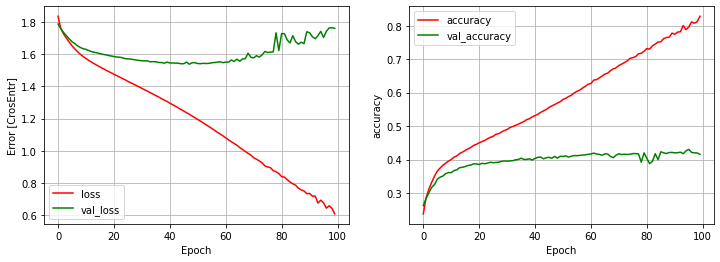

In [ ]:
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(MLP_relu_history.history['loss'], label='loss', color='red')
plt.plot(MLP_relu_history.history['val_loss'], label='val_loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(MLP_relu_history.history['accuracy'], label='accuracy', color='red')
plt.plot(MLP_relu_history.history['val_accuracy'], label='val_accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)


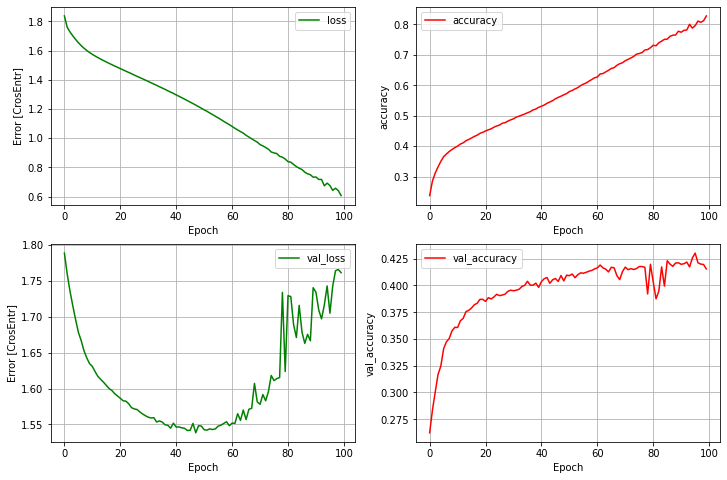

In [ ]:
fig = plt.figure(figsize=(12,8))
plt.subplot(2, 2, 1)
plt.plot(MLP_relu_history.history['loss'], label='loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(MLP_relu_history.history['accuracy'], label='accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(MLP_relu_history.history['val_loss'], label='val_loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(MLP_relu_history.history['val_accuracy'], label='val_accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('val_accuracy')
plt.legend()
plt.grid(True)


In [ ]:
hist = pd.DataFrame(MLP_relu_history.history)
hist['epoch'] = MLP_relu_history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
95,0.675652,0.796238,1.705022,0.430239,95
96,0.642725,0.811346,1.743020,0.421181,96
97,0.657370,0.807297,1.764314,0.419962,97
98,0.641088,0.812173,1.765963,0.419613,98
99,0.606809,0.828239,1.761560,0.415433,99


In [ ]:
print("Max train acc: ", max(hist['accuracy']))
print("Max val acc: ", max(hist['val_accuracy']))

print("Min train loss: ", min(hist['loss']))
print("Min val loss: ", min(hist['val_loss']))

Max train acc:  0.8282392621040344
Max val acc:  0.43023863434791565
Min train loss:  0.6068087816238403
Min val loss:  1.5383226871490479
